In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family='MalgunGothic')
%matplotlib inline
import seaborn as sns
import pandas_profiling as pp
import codecs
import datetime
from pandas import DataFrame as df

In [2]:
# 데이터 불러오기
data = pd.read_excel('마스터.xlsx')
len(data)
data.head()

,Unnamed: 0,Unnamed: 0.1,url,메이커,펀딩시작날짜,펀딩마감날짜,펀딩시작요일,목표금액,서포터수,좋아요수,...,문장수_제목,가독성_제목,가독성_제목.1,펀딩기간,일펀딩금액,일글수,문장당강조,문장당밑줄,문장지수,성공비율
0,0,4440,https://www.wadiz.kr/web/campaign/detail/17233,건강한연구소,2018-06-27,2018-08-01,Wed,1000000,318,193,...,2,103.625000,1.290000,35,28571.428571,0.171429,0.295455,0.340909,0.636364,1.000000
1,1,4441,https://www.wadiz.kr/web/campaign/detail/19909,카페 펠리스,2018-06-27,2018-07-31,Wed,1000000,46,24,...,1,86.705000,3.650000,34,29411.764706,0.147059,0.337748,0.278146,0.615894,1.000000
2,2,4442,https://www.wadiz.kr/web/campaign/detail/20844,Future Food Lab,2018-06-27,2018-07-22,Wed,1000000,559,168,...,2,55.125227,6.936818,25,40000.000000,0.240000,0.140625,0.109375,0.250000,1.000000
3,3,4443,https://www.wadiz.kr/web/campaign/detail/21456,농부대첩,2018-06-27,2018-07-09,Wed,1000000,543,232,...,1,69.785000,6.010000,12,83333.333333,1.416667,0.368421,0.122807,0.491228,0.962963
4,4,4444,https://www.wadiz.kr/web/campaign/detail/18871,스튜디오와츠,2018-06-27,2018-07-31,Wed,500000,3,10,...,1,-18.500000,18.075556,34,14705.882353,0.029412,0.322581,0.086022,0.408602,0.000000


In [3]:
len(data)

5284

In [4]:
data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'url', '메이커', '펀딩시작날짜', '펀딩마감날짜',
       '펀딩시작요일', '목표금액', '서포터수', '좋아요수', '글업데이트수', '댓글수', '리워드종류수', '이미지수',
       '비디오수', '배송시작날짜', '마감배송차이', '인스타존재여부', '인스타팔로워수', '와디즈팔로워수', '과거프로젝트수',
       '과거성공프로젝트수', '앵콜펀딩여부', '음절수', '단어수', '문장수', 'Strong', 'Under', '가독성',
       '가독성2', '제목단어수', '펀딩성공여부', '달성률', '펀딩시작월', '소비자물가', '근원물가', '생활물가',
       '실질GDP성장률', '제목', '달성액', '요약글', '카테고리', '디자인소품', '반려동물', '뷰티',
       '스포츠·모빌리티', '여행·레저', '테크·가전', '패션·잡화', '푸드', '홈리빙', '분기', '와디즈기사개수',
       '크라우드펀딩기사개수', 'PER', 'PBR', 'ROE', 'EBIT', '페이스북팔로워수', 'sns팔로워수', 'Fri',
       'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', '음절수_제목', '단어수_제목', '문장수_제목',
       '가독성_제목', '가독성_제목.1', '펀딩기간', '일펀딩금액', '일글수', '문장당강조', '문장당밑줄', '문장지수',
       '성공비율'],
      dtype='object')

In [5]:
# 데이터 모두 보기위해
pd.set_option('display.max_columns', 1000)

In [6]:
data.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis = 1, inplace = True)

In [7]:
len(data.columns)

77

In [8]:
# 시각화지수 없으므로 시각화지수 포함
data['시각화지수'] = data.좋아요수 + (data.이미지수*10) + (100 - data.비디오수*10)

In [9]:
data.columns

Index(['url', '메이커', '펀딩시작날짜', '펀딩마감날짜', '펀딩시작요일', '목표금액', '서포터수', '좋아요수',
       '글업데이트수', '댓글수', '리워드종류수', '이미지수', '비디오수', '배송시작날짜', '마감배송차이',
       '인스타존재여부', '인스타팔로워수', '와디즈팔로워수', '과거프로젝트수', '과거성공프로젝트수', '앵콜펀딩여부',
       '음절수', '단어수', '문장수', 'Strong', 'Under', '가독성', '가독성2', '제목단어수',
       '펀딩성공여부', '달성률', '펀딩시작월', '소비자물가', '근원물가', '생활물가', '실질GDP성장률', '제목',
       '달성액', '요약글', '카테고리', '디자인소품', '반려동물', '뷰티', '스포츠·모빌리티', '여행·레저',
       '테크·가전', '패션·잡화', '푸드', '홈리빙', '분기', '와디즈기사개수', '크라우드펀딩기사개수', 'PER',
       'PBR', 'ROE', 'EBIT', '페이스북팔로워수', 'sns팔로워수', 'Fri', 'Mon', 'Sat', 'Sun',
       'Thu', 'Tue', 'Wed', '음절수_제목', '단어수_제목', '문장수_제목', '가독성_제목', '가독성_제목.1',
       '펀딩기간', '일펀딩금액', '일글수', '문장당강조', '문장당밑줄', '문장지수', '성공비율', '시각화지수'],
      dtype='object')

In [10]:
# 필요한 컬럼만 추출
# 리워드수_분류, 일펀딩_분류가 빠져있음

total = data[['달성률','목표금액', '글업데이트수',\
'리워드종류수', '이미지수', '비디오수','마감배송차이','인스타존재여부',\
'와디즈팔로워수', '과거프로젝트수', '과거성공프로젝트수', '앵콜펀딩여부',\
'음절수', '단어수', '문장수', 'Strong', 'Under', '가독성', '가독성2','제목단어수',\
'디자인소품', '반려동물', '뷰티', '스포츠·모빌리티', '여행·레저','테크·가전', '패션·잡화', '푸드',\
'홈리빙', 'sns팔로워수', 'Fri', 'Mon', 'Sat', 'Sun','Thu', 'Tue',\
'Wed', '음절수_제목', '단어수_제목', '문장수_제목', '가독성_제목', '가독성_제목.1',\
'펀딩기간', '일펀딩금액', '일글수', '문장당강조', '문장당밑줄', '문장지수', '성공비율']]

In [11]:
# 달성률 범주 생성
# 임의의 범주(100, 700) / 근거 생각해보기

total.index = list(range(len(total)))
total_target = total

target_list = []

for i in range(len(total_target)):
    if total_target.달성률[i] < 100:
        target_list.append(0)
        
    elif total_target.달성률[i] < 850:
        target_list.append(1)
        
    else:
        target_list.append(2)
        
total_target['타겟'] = target_list
total_target.pivot_table(index = '타겟', aggfunc = 'count', values = '달성률')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,달성률
타겟,
0,1114
1,2822
2,1348


In [12]:
# 달성률 분류 분포
total_target.pivot_table(index = '타겟', aggfunc = 'count', values = '달성률')

,달성률
타겟,
0,1114
1,2822
2,1348


In [14]:
total_target.drop(columns = ['달성률'], axis = 1, inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [15]:
total_target.columns

Index(['목표금액', '글업데이트수', '리워드종류수', '이미지수', '비디오수', '마감배송차이', '인스타존재여부',
       '와디즈팔로워수', '과거프로젝트수', '과거성공프로젝트수', '앵콜펀딩여부', '음절수', '단어수', '문장수',
       'Strong', 'Under', '가독성', '가독성2', '제목단어수', '디자인소품', '반려동물', '뷰티',
       '스포츠·모빌리티', '여행·레저', '테크·가전', '패션·잡화', '푸드', '홈리빙', 'sns팔로워수', 'Fri',
       'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', '음절수_제목', '단어수_제목', '문장수_제목',
       '가독성_제목', '가독성_제목.1', '펀딩기간', '일펀딩금액', '일글수', '문장당강조', '문장당밑줄', '문장지수',
       '성공비율', '타겟'],
      dtype='object')

In [16]:
# '타겟'을 종속변수로
X = total_target.drop(columns = ['타겟'])
y = total_target.타겟

# 학습용/테스트용 데이터 분리

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)

from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()

dt_clf.fit(X_train, y_train)

print('학습 에러:', dt_clf.score(X_train, y_train))
print('테스트 에러:', dt_clf.score(X_test, y_test))

y_pred = dt_clf.predict(X_test)

print('--------------------------------')

import sklearn.metrics as mt

print(mt.accuracy_score(y_pred, y_test))
print(mt.confusion_matrix(y_pred, y_test))

pd.DataFrame({'속성명': total_target.columns[:-1], '중요도':dt_clf.feature_importances_}).sort_values('중요도', ascending=False)

학습 에러: 1.0
테스트 에러: 0.6941992433795713
--------------------------------
0.6941992433795713
[[267  53   3]
 [ 47 633 195]
 [  2 185 201]]


,속성명,중요도
47,성공비율,0.256975
1,글업데이트수,0.185072
7,와디즈팔로워수,0.058814
43,일글수,0.049235
0,목표금액,0.028030
28,sns팔로워수,0.024437
5,마감배송차이,0.023740
42,일펀딩금액,0.022928
40,가독성_제목.1,0.022453
13,문장수,0.021971


In [17]:
# GridSearchCV로 하이퍼파라미터 최적화
from sklearn.model_selection import GridSearchCV

# 테스트할 파라미터 목록 및 값들을 사전 타입으로 정의
parameters = {\
             'max_depth':[3,5,7,9,11],\
             'min_samples_split':[10, 20, 30, 40],\
             'criterion':['gini', 'entropy']\
             }

# GridSearchCV 객체 생성
grid_dt = GridSearchCV(dt_clf, param_grid = parameters, cv = 5)

# GridSearchCV로 학습 수행
grid_dt.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [3, 5, 7, 9, 11], 'min_samples_split': [10, 20, 30, 40], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [18]:
# 최적의 파라미트 조합 출력
grid_dt.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 40}

In [19]:
# 테스트 정확도
grid_dt.best_estimator_.score(X_test, y_test)

0.7711223203026482

In [20]:
# 결정트리 결과를 그래프로 시각화
import graphviz

In [21]:
f_importances = grid_dt.best_estimator_.feature_importances_
dt_f_importances = pd.DataFrame({'속성명': X_train.columns, '중요도':f_importances})

In [23]:
dt_f_importances.sort_values(by = '중요도', ascending=False)

,속성명,중요도
47,성공비율,0.528579
1,글업데이트수,0.280228
7,와디즈팔로워수,0.058675
43,일글수,0.052611
0,목표금액,0.041227
27,홈리빙,0.011508
3,이미지수,0.007445
42,일펀딩금액,0.006743
9,과거성공프로젝트수,0.004469
11,음절수,0.004033


In [24]:
# TREE 시각화
# 단순한 결정트리 모델 생성
simple_dt = DecisionTreeClassifier(max_depth = 5)
simple_dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [25]:
# Tree 시각화
from sklearn import tree
from sklearn.tree import export_graphviz
import os
os.environ['PATH'] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

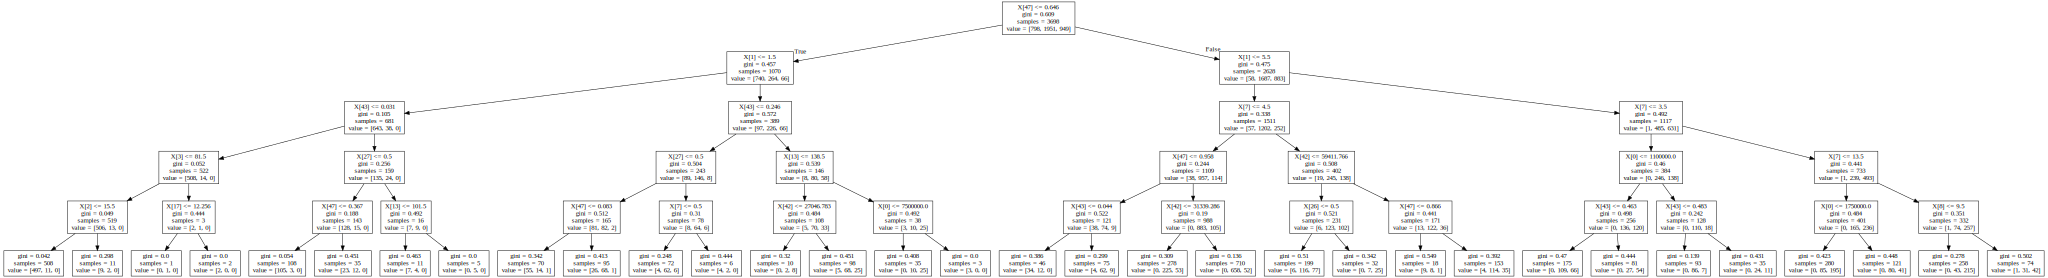

In [26]:
dot_data = tree.export_graphviz(simple_dt, out_file = None)
graph = graphviz.Source(dot_data)
graph

## 일펀딩_분류, 리워드종류수_분류로 바꿔서 해보기

In [27]:
data.index = list(range(len(data)))

label = [0,1,2,3,4]
bins = [-1, 1, 4, 16,22,10000]
cats = pd.cut(data.리워드종류수, bins, labels = label)

data['리워드종류수_분류'] = cats

In [28]:
data.index = list(range(len(data)))

label = [0,1,2,3,4,]
bins = [0, 15000, 65000, 100000, 500000, 1000000000]
cats = pd.cut(data.일펀딩금액, bins, labels = label)

data['일펀딩_분류'] = cats

In [29]:
total2 = data[['달성률','목표금액', '글업데이트수',\
'리워드종류수', '이미지수', '비디오수','마감배송차이','인스타존재여부',\
'와디즈팔로워수', '과거프로젝트수', '과거성공프로젝트수', '앵콜펀딩여부',\
'음절수', '단어수', '문장수', 'Strong', 'Under', '가독성', '가독성2','제목단어수',\
'디자인소품', '반려동물', '뷰티', '스포츠·모빌리티', '여행·레저','테크·가전', '패션·잡화', '푸드',\
'홈리빙', 'sns팔로워수', 'Fri', 'Mon', 'Sat', 'Sun','Thu', 'Tue',\
'Wed', '음절수_제목', '단어수_제목', '문장수_제목', '가독성_제목', '가독성_제목.1',\
'펀딩기간', '일펀딩금액', '일글수', '문장당강조', '문장당밑줄', '문장지수', '성공비율']]

In [30]:
total2.index = list(range(len(total2)))
total2 = total2

target_list2 = []

for i in range(len(total2)):
    if total2.달성률[i] < 100:
        target_list2.append(0)
        
    elif total2.달성률[i] < 700:
        target_list2.append(1)
        
    else:
        target_list2.append(2)
        
total2['타겟'] = target_list2
total2.pivot_table(index = '타겟', aggfunc = 'count', values = '달성률')
total2 = total2.drop(columns = '달성률')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [31]:
total2.columns

Index(['목표금액', '글업데이트수', '리워드종류수', '이미지수', '비디오수', '마감배송차이', '인스타존재여부',
       '와디즈팔로워수', '과거프로젝트수', '과거성공프로젝트수', '앵콜펀딩여부', '음절수', '단어수', '문장수',
       'Strong', 'Under', '가독성', '가독성2', '제목단어수', '디자인소품', '반려동물', '뷰티',
       '스포츠·모빌리티', '여행·레저', '테크·가전', '패션·잡화', '푸드', '홈리빙', 'sns팔로워수', 'Fri',
       'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', '음절수_제목', '단어수_제목', '문장수_제목',
       '가독성_제목', '가독성_제목.1', '펀딩기간', '일펀딩금액', '일글수', '문장당강조', '문장당밑줄', '문장지수',
       '성공비율', '타겟'],
      dtype='object')

In [32]:
X = total2.drop(columns = ['타겟'])
y = total2.타겟

# 학습용/테스트용 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)

dt_clf2 = DecisionTreeClassifier()

dt_clf2.fit(X_train, y_train)

print('학습 에러:', dt_clf2.score(X_train, y_train))
print('테스트 에러:', dt_clf2.score(X_test, y_test))

y_pred = dt_clf2.predict(X_test)

print('--------------------------------')
print(mt.accuracy_score(y_pred, y_test))
print(mt.confusion_matrix(y_pred, y_test))

pd.DataFrame({'속성명': total2.columns[:-1], '중요도':dt_clf2.feature_importances_}).sort_values('중요도', ascending=False)

학습 에러: 1.0
테스트 에러: 0.7036569987389659
--------------------------------
0.7036569987389659
[[267  37   7]
 [ 45 579 186]
 [  4 191 270]]


,속성명,중요도
47,성공비율,0.238996
1,글업데이트수,0.190161
7,와디즈팔로워수,0.063057
43,일글수,0.041263
3,이미지수,0.032666
0,목표금액,0.026213
42,일펀딩금액,0.025961
39,가독성_제목,0.023366
41,펀딩기간,0.023179
17,가독성2,0.022903


In [33]:
parameters = {\
             'max_depth':[3,5,7,9,11,13],\
             'min_samples_split':[10, 20, 30, 40],\
             'criterion':['gini', 'entropy']\
             }

# GridSearchCV 객체 생성
grid_dt2 = GridSearchCV(dt_clf, param_grid = parameters, cv = 5)

# GridSearchCV로 학습 수행
grid_dt2.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [3, 5, 7, 9, 11, 13], 'min_samples_split': [10, 20, 30, 40], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [34]:
# 최적의 파라미터 찾기
grid_dt2.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 40}

In [35]:
# 테스트 정확도
grid_dt2.best_estimator_.score(X_test, y_test)

0.7477931904161412